In [3]:
import uproot
import matplotlib.pyplot as plt
import numpy as np

In [46]:
data_1tesla = uproot.open("test_files/output_1T.root")
data_100tesla = uproot.open("test_files/output_100T.root")
# data_10tesla = uproot.open("test_files/output_10T.root")
# data_2tesla = uproot.open("test_files/output_2T.root")
# data_3tesla = uproot.open("test_files/output_3T.root")

In [22]:
def get_ee_separation(data, station):
    kin = data[f"Hits{station}"].arrays(["ep_x", "ep_y", "em_x", "em_y"], library='np')
    
    separation = np.sqrt((kin["ep_x"] - kin["em_x"])**2 + (kin["ep_y"] - kin["em_y"])**2)
    
    return separation

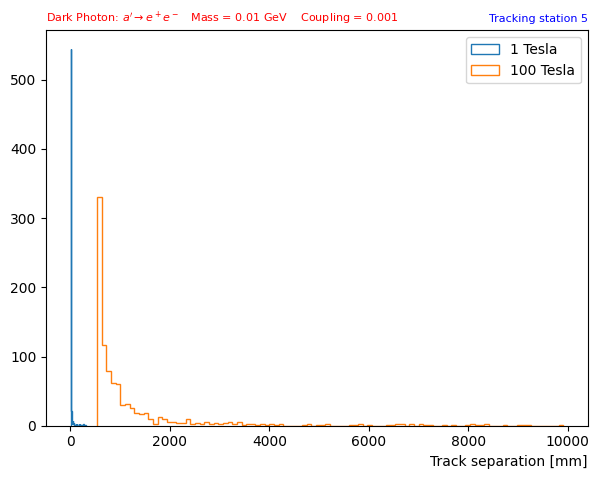

In [49]:
fix, ax = plt.subplots()
plt.tight_layout(pad=2)

bins = 100
xlim = 500
station = 5

ax.set_title(r"Dark Photon: $a' \rightarrow e^+ e ^-$"  + f"   Mass = {0.01} GeV    Coupling = {0.001}", loc="left", color="red", fontsize="8")
ax.set_title(f"Tracking station {station}", loc="right", color="blue", fontsize=8)
ax.set_xlabel("Track separation [mm]", loc='right')
    
ax.hist(get_ee_separation(data_1tesla, station), bins, label="1 Tesla", histtype="step")
# ax.hist(get_ee_separation(data_2tesla, station), bins, label="2 Tesla", histtype="step")
# ax.hist(get_ee_separation(data_3tesla, station), bins, label="3 Tesla", histtype="step")
# ax.hist(get_ee_separation(data_10tesla, station), bins, label="10 Tesla", histtype="step")
ax.hist(get_ee_separation(data_100tesla, station), bins, label="100 Tesla", histtype="step")
ax.legend()
plt.savefig("MagField.pdf")
plt.show()
